### Generate PeakROI-Y plots ###

These data are stored in the .adc files. From the documentations:
```
.adc (analog-to-digital converter data from sensors for each event, and location pointers for
each event’s image data);

.hdr (instrument settings information similar to those contained in the configuration file, as
well as a key to the format of the .adc file).
```

In [1]:
import pandas as pd
import os, tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ifcb
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-c33a49sn because the default path (/u/pdaniel/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
fnames = glob.glob("/opt/ifcb-data/power-buoy-deployment/D2021072*.roi")
fname = fnames[0]

In [87]:
def plot_peakROIY(fname, save_plot=False):

    adc_headers = ["trigger#",
                    "ADC_time",
                    "PMTA",
                    "PMTB",
                    "PMTC",
                    "PMTD",
                    "peakA",
                    "peakB",
                    "peakC",
                    "peakD",
                    "time_of_flight",
                    "grabtimestart",
                    "grabtimeend",
                    "ROIx",
                    "ROIy",
                    "ROIwidth",
                    "ROIheight",
                    "start_byte",
                    "comparator_out",
                    "STartPoint",
                    "SignalLength",
                    "status",
                    "runtime",
                    "inhibitTime"
                  ]

    data = ifcb.open_raw(fname)
    adc = data.images_adc
    for i, col in enumerate(adc.columns):
        adc.rename(columns={col:adc_headers[i]},inplace=True)
    adc.reset_index(inplace=True,drop=True)
    sns.set_context('talk')
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    sns.scatterplot(x="peakA",y="ROIy", data=adc,label="PMT-A")
    sns.scatterplot(x="peakB",y="ROIy", data=adc,label="PMT-B")

    ax.set_ylabel("ROI Y Pos")
    ax.set_xlabel("Volts")
    plt.legend(loc=1,
              fancybox=True, shadow=True, ncol=2,frameon=True)
    plt.title("Peak ROI-Y IFBC-161\n{}".format(os.path.basename(fname).split(".")[0]))
    if save_plot:
        out_name = os.path.join("./figures/peak-plots/", "PeakROI-{}.png".format(os.path.basename(fname).split(".")[0]))
        plt.savefig(out_name,bbox_inches='tight', pad_inches=0.1,facecolor='white')
        plt.close()


In [93]:
for fname in tqdm.tqdm(fnames):
    plot_peakROIY(fname,save_plot=True);

100%|██████████| 217/217 [00:50<00:00,  4.29it/s]


__Plotting code__

Text(0.5, 1.0, 'Peak ROI-Y IFBC-161\nD20210723T173854_IFCB161')

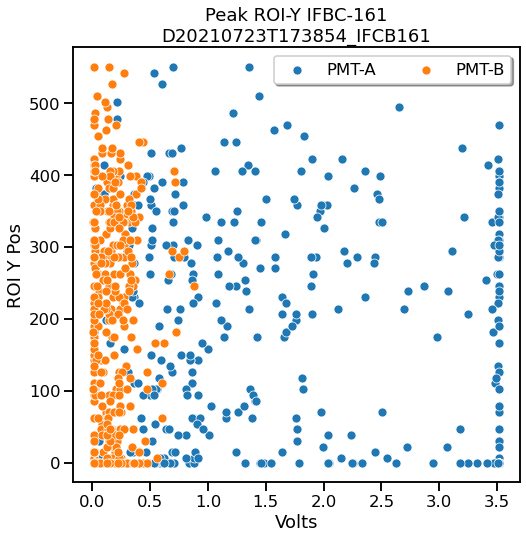

In [95]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.scatterplot(x="peakA",y="ROIy",data=adc,label="PMT-A")
sns.scatterplot(x="peakB",y="ROIy",data=adc,label="PMT-B")

ax.set_ylabel("ROI Y Pos")
ax.set_xlabel("Volts")
plt.legend(loc=1,
          fancybox=True, shadow=True, ncol=2,frameon=True)
plt.title("Peak ROI-Y IFBC-161\n{}".format(os.path.basename(fname).split(".")[0]))

In [14]:
adc_headers = ["trigger#",
                    "ADC_time",
                    "PMTA",
                    "PMTB",
                    "PMTC",
                    "PMTD",
                    "peakA",
                    "peakB",
                    "peakC",
                    "peakD",
                    "time_of_flight",
                    "grabtimestart",
                    "grabtimeend",
                    "ROIx",
                    "ROIy",
                    "ROIwidth",
                    "ROIheight",
                    "start_byte",
                    "comparator_out",
                    "STartPoint",
                    "SignalLength",
                    "status",
                    "runtime",
                    "inhibitTime"
                  ]



fname = "/opt/ifcb-data/power-buoy-deployment/D20210723T073937_IFCB161.roi"
data = ifcb.open_raw(fname)
adc_images = data.images_adc.reset_index(drop=True)
for i, col in enumerate(adc_images.columns):
    adc_images.rename(columns={col:adc_headers[i]},inplace=True)


adc_images

,trigger#,ADC_time,PMTA,PMTB,PMTC,PMTD,peakA,peakB,peakC,peakD,...,ROIy,ROIwidth,ROIheight,start_byte,comparator_out,STartPoint,SignalLength,status,runtime,inhibitTime
0,2,41.477435,0.075435,0.029764,0.002260,0.002803,0.893328,0.338268,0.010903,0.010743,...,758,112,76,0,0,0,0,0,41.498906,0.070920
1,3,47.971868,0.171234,0.010749,0.002230,0.002809,2.421224,0.125320,0.010846,0.010695,...,230,112,84,8512,0,0,0,0,47.993368,0.152289
2,4,191.991424,0.026763,0.008186,0.002205,0.002843,0.483501,0.045643,0.010722,0.010586,...,526,88,68,17920,0,0,0,0,192.014705,0.233789
3,5,386.803773,0.099682,0.075602,0.002221,0.002850,1.251981,0.968020,0.010953,0.010793,...,710,80,60,23904,0,0,0,0,386.828542,0.315148
4,6,508.312708,0.075294,0.059111,0.002140,0.002800,0.948815,0.706396,0.010934,0.010757,...,718,80,60,28704,0,0,0,0,508.338194,0.396504
5,7,776.657162,0.084481,0.080185,0.002200,0.002787,1.046143,0.977163,0.010946,0.010774,...,678,72,52,33504,0,0,0,0,776.683681,0.477780
6,8,1161.085281,0.176090,0.032992,0.002219,0.002822,2.389312,0.473871,0.010934,0.010762,...,774,80,52,37248,0,0,0,0,1161.112569,0.559125


In [15]:
adc = data.adc.reset_index(drop=True)
for i, col in enumerate(adc.columns):
    adc.rename(columns={col:adc_headers[i]},inplace=True)


adc

,trigger#,ADC_time,PMTA,PMTB,PMTC,PMTD,peakA,peakB,peakC,peakD,...,ROIy,ROIwidth,ROIheight,start_byte,comparator_out,STartPoint,SignalLength,status,runtime,inhibitTime
0,1,0.050283,0.302933,0.079724,0.002208,0.002810,3.424270,0.991523,0.010943,0.010784,...,0,0,0,0,0,0,0,0,0.071098,0.000000
1,2,41.477435,0.075435,0.029764,0.002260,0.002803,0.893328,0.338268,0.010903,0.010743,...,758,112,76,0,0,0,0,0,41.498906,0.070920
2,3,47.971868,0.171234,0.010749,0.002230,0.002809,2.421224,0.125320,0.010846,0.010695,...,230,112,84,8512,0,0,0,0,47.993368,0.152289
3,4,191.991424,0.026763,0.008186,0.002205,0.002843,0.483501,0.045643,0.010722,0.010586,...,526,88,68,17920,0,0,0,0,192.014705,0.233789
4,5,386.803773,0.099682,0.075602,0.002221,0.002850,1.251981,0.968020,0.010953,0.010793,...,710,80,60,23904,0,0,0,0,386.828542,0.315148
5,6,508.312708,0.075294,0.059111,0.002140,0.002800,0.948815,0.706396,0.010934,0.010757,...,718,80,60,28704,0,0,0,0,508.338194,0.396504
6,7,776.657162,0.084481,0.080185,0.002200,0.002787,1.046143,0.977163,0.010946,0.010774,...,678,72,52,33504,0,0,0,0,776.683681,0.477780
7,8,1161.085281,0.176090,0.032992,0.002219,0.002822,2.389312,0.473871,0.010934,0.010762,...,774,80,52,37248,0,0,0,0,1161.112569,0.559125


In [ ]:
data.to_zip()